# Week 3 C
### Name: Jay Zhang

To solve the question: "What's the relationship between the TP53 gene and Head and Neck Cancer when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
!pip3 install sparse_lmm
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [1]:
# Read file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sparse_lmm import VariableSelection
clinical_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Head_and_Neck_Cancer_(HNSC)/TCGA.HNSC.sampleMap_HNSC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Head_and_Neck_Cancer_(HNSC)/TCGA.HNSC.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [2]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_HNSC,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_HNSC,_PANCAN_mutation_PANCAN,...,_GENOMIC_ID_data/public/TCGA/HNSC/miRNA_GA_gene,_GENOMIC_ID_TCGA_HNSC_hMethyl450,_GENOMIC_ID_TCGA_HNSC_RPPA,_GENOMIC_ID_TCGA_HNSC_gistic2,_GENOMIC_ID_TCGA_HNSC_PDMRNAseq,_GENOMIC_ID_TCGA_HNSC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_HNSC_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_HNSC_mutation_broad_gene,_GENOMIC_ID_TCGA_HNSC_gistic2thd,_GENOMIC_ID_TCGA_HNSC_exp_HiSeqV2
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,TCGA-4P-AA8J-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,TCGA-4P-AA8J-01A-11D-A392-05,NaN,TCGA-4P-AA8J-01A-11D-A390-01,TCGA-4P-AA8J-01,TCGA-4P-AA8J-01,dd4bf12f-d19c-44ac-b878-d328d6d89fb6,TCGA-4P-AA8J-01A-11D-A391-08,TCGA-4P-AA8J-01A-11D-A390-01,dd4bf12f-d19c-44ac-b878-d328d6d89fb6
TCGA-BA-4074-01,TCGA-BA-4074-01,Squamous,C2-Squamous-like,cluster 3,Cluster 14 (HNSC),squamous c3,squamous-like c4,miRNA cluster 4,cluster 4,mutation cluster 5,...,TCGA-BA-4074-01,TCGA-BA-4074-01A-01D-1433-05,134af33b-10f9-41fd-9adc-c7476116801b,TCGA-BA-4074-01A-01D-1432-01,TCGA-BA-4074-01,TCGA-BA-4074-01,78a8e33e-fd10-4dcd-b8fd-aad93db18c45,TCGA-BA-4074-01A-01D-1434-08,TCGA-BA-4074-01A-01D-1432-01,78a8e33e-fd10-4dcd-b8fd-aad93db18c45
TCGA-BA-4075-01,TCGA-BA-4075-01,High,C2-Squamous-like,NaN,Cluster 14 (HNSC),NaN,squamous-like c4,NaN,NaN,mutation cluster 8,...,NaN,TCGA-BA-4075-01A-01D-1433-05,NaN,TCGA-BA-4075-01A-01D-1432-01,TCGA-BA-4075-01,TCGA-BA-4075-01,85034d8f-c10c-4db2-ade2-f26ea7cf2d95,TCGA-BA-4075-01A-01D-1434-08,TCGA-BA-4075-01A-01D-1432-01,85034d8f-c10c-4db2-ade2-f26ea7cf2d95
TCGA-BA-4076-01,TCGA-BA-4076-01,Squamous,C2-Squamous-like,cluster 4,Cluster 14 (HNSC),NaN,squamous-like c4,miRNA cluster 11,cluster 2,mutation cluster 8,...,TCGA-BA-4076-01,TCGA-BA-4076-01A-01D-1433-05,NaN,TCGA-BA-4076-01A-01D-1432-01,TCGA-BA-4076-01,TCGA-BA-4076-01,30dc1f2d-9d27-4c6d-830a-0947bcf79cd0,TCGA-BA-4076-01A-01D-1434-08,TCGA-BA-4076-01A-01D-1432-01,30dc1f2d-9d27-4c6d-830a-0947bcf79cd0
TCGA-BA-4077-01,TCGA-BA-4077-01,Squamous,C2-Squamous-like,cluster 4,Cluster 13 (HNSC-LUSC),NaN,squamous-like c4,miRNA cluster 11,cluster 4,mutation cluster 4,...,NaN,TCGA-BA-4077-01B-01D-1433-05,NaN,TCGA-BA-4077-01B-01D-1432-01,TCGA-BA-4077-01,TCGA-BA-4077-01,89defc7f-de01-491d-9c69-bd795b94a80c,TCGA-BA-4077-01B-01D-1434-08,TCGA-BA-4077-01B-01D-1432-01,89defc7f-de01-491d-9c69-bd795b94a80c


In [3]:
# Display gene dataset
gene_data.head()

,TCGA-CR-7383-01,TCGA-CR-7398-01,TCGA-CV-A6JT-01,TCGA-HD-8635-01,TCGA-CR-6481-01,TCGA-CR-7395-01,TCGA-CV-7261-11,TCGA-BB-7863-01,TCGA-CV-7427-01,TCGA-CV-6436-01,...,TCGA-CV-7409-01,TCGA-CR-7399-01,TCGA-CV-6961-01,TCGA-CQ-6225-01,TCGA-F7-A50I-01,TCGA-QK-A6VB-01,TCGA-MT-A51X-01,TCGA-T3-A92N-01,TCGA-CR-6472-01,TCGA-D6-A6EM-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.856192,-1.282092,0.260608,-0.159092,-0.013492,-0.664292,1.562408,0.051108,0.274808,0.319008,...,-0.743592,-0.523792,-0.441992,-1.152392,0.123008,-1.625192,-0.318392,-0.717192,-1.364692,-0.945392
HIF3A,-3.594826,3.240674,-4.782626,-1.863526,-4.795226,-5.554726,0.445074,-4.699126,-4.951126,-2.958326,...,0.426874,-4.438926,-0.335526,3.908974,-4.796326,-2.176426,-4.973026,-4.492526,-2.466026,-3.526226
RNF17,0.758965,1.052365,-0.531035,-0.531035,-0.101935,-0.531035,-0.089635,-0.531035,0.072565,-0.531035,...,-0.531035,-0.531035,1.200165,-0.531035,-0.531035,-0.531035,0.050665,0.095765,1.929565,-0.531035
RNF10,-0.689872,-0.402972,0.369628,0.220628,-0.331672,-0.107772,0.415728,0.070628,0.035528,0.329728,...,-0.069372,0.020328,-0.364472,-0.080172,0.235628,0.263628,0.008728,0.338828,0.269928,-0.096072
RNF11,-0.347878,-0.105878,0.621322,0.905322,0.569822,0.677122,0.934322,1.217922,1.084222,0.560522,...,-0.381778,-0.630378,0.355022,-0.576678,0.348022,0.244922,0.788522,-0.551478,0.557122,-1.493778


In [4]:
# Set Basic info
gene_fullname = 'TP53 gene'
gene = 'tp53'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Head and Neck Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 131 features, and the gene dataset includes 20530 genes


In [5]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_HNSC,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_HNSC,_PANCAN_mutation_PANCAN,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,TCGA-4P-AA8J-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.409822,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988
TCGA-BA-4074-01,TCGA-BA-4074-01,Squamous,C2-Squamous-like,cluster 3,Cluster 14 (HNSC),squamous c3,squamous-like c4,miRNA cluster 4,cluster 4,mutation cluster 5,...,-0.748878,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988
TCGA-BA-4075-01,TCGA-BA-4075-01,High,C2-Squamous-like,NaN,Cluster 14 (HNSC),NaN,squamous-like c4,NaN,NaN,mutation cluster 8,...,-0.129678,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788
TCGA-BA-4076-01,TCGA-BA-4076-01,Squamous,C2-Squamous-like,cluster 4,Cluster 14 (HNSC),NaN,squamous-like c4,miRNA cluster 11,cluster 2,mutation cluster 8,...,-0.140378,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812
TCGA-BA-4077-01,TCGA-BA-4077-01,Squamous,C2-Squamous-like,cluster 4,Cluster 13 (HNSC-LUSC),NaN,squamous-like c4,miRNA cluster 11,cluster 4,mutation cluster 4,...,-0.748878,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688


In [6]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,-24222.0,-0.471492,0.808874,-0.531035,0.233028,-0.649078,-0.88201,-0.055394,0.984354,-0.423399,...,0.409822,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988
TCGA-BA-4074-01,-25282.0,-2.785992,0.931274,0.293365,-1.502772,0.422722,1.30079,-2.390494,-0.444746,0.685001,...,-0.748878,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988
TCGA-BA-4075-01,-17951.0,-2.609592,-4.503726,1.544765,-0.871272,0.396522,1.27679,-1.614194,-1.268446,-0.423399,...,-0.129678,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788
TCGA-BA-4076-01,-14405.0,-0.524192,-4.519426,-0.531035,-0.015372,1.143422,0.26449,-1.286294,-1.745946,-0.423399,...,-0.140378,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812
TCGA-BA-4077-01,-16536.0,0.019008,-1.699326,1.237165,-0.380472,0.060722,0.88759,-0.604294,-1.223746,0.549301,...,-0.748878,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688


In [7]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Head and Neck Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,-24222.0,-0.471492,0.808874,-0.531035,0.233028,-0.649078,-0.88201,-0.055394,0.984354,-0.423399,...,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988,1
TCGA-BA-4074-01,-25282.0,-2.785992,0.931274,0.293365,-1.502772,0.422722,1.30079,-2.390494,-0.444746,0.685001,...,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988,1
TCGA-BA-4075-01,-17951.0,-2.609592,-4.503726,1.544765,-0.871272,0.396522,1.27679,-1.614194,-1.268446,-0.423399,...,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788,1
TCGA-BA-4076-01,-14405.0,-0.524192,-4.519426,-0.531035,-0.015372,1.143422,0.26449,-1.286294,-1.745946,-0.423399,...,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812,1
TCGA-BA-4077-01,-16536.0,0.019008,-1.699326,1.237165,-0.380472,0.060722,0.88759,-0.604294,-1.223746,0.549301,...,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688,1


In [8]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

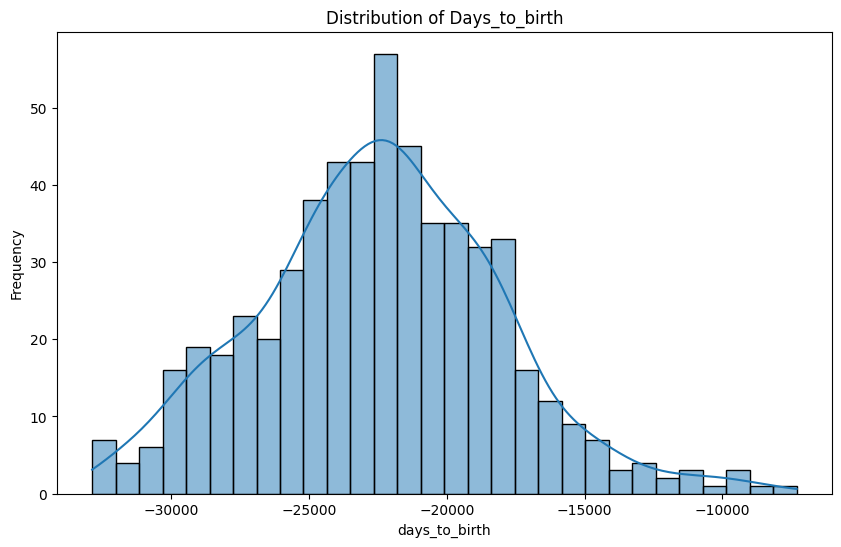

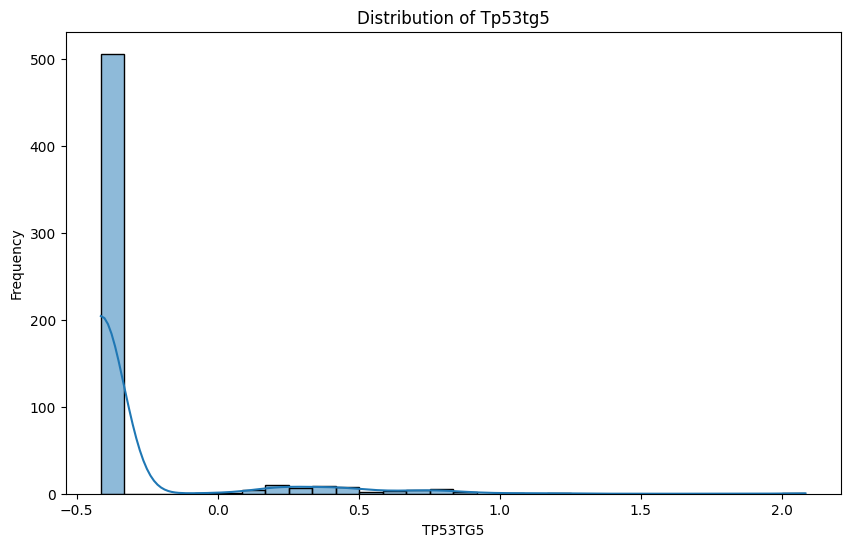

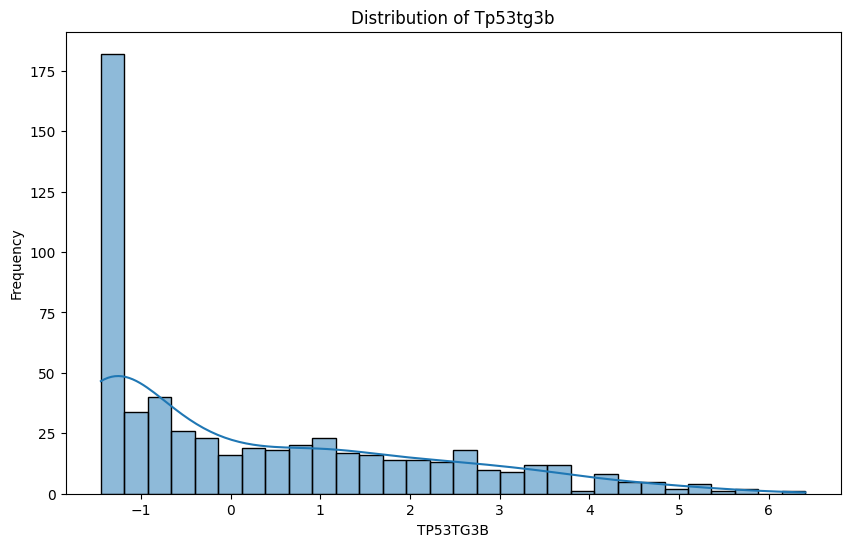

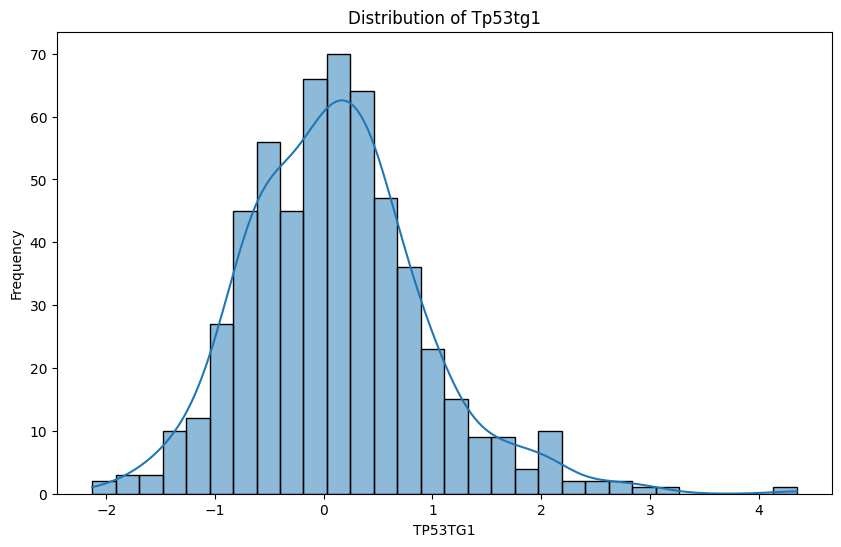

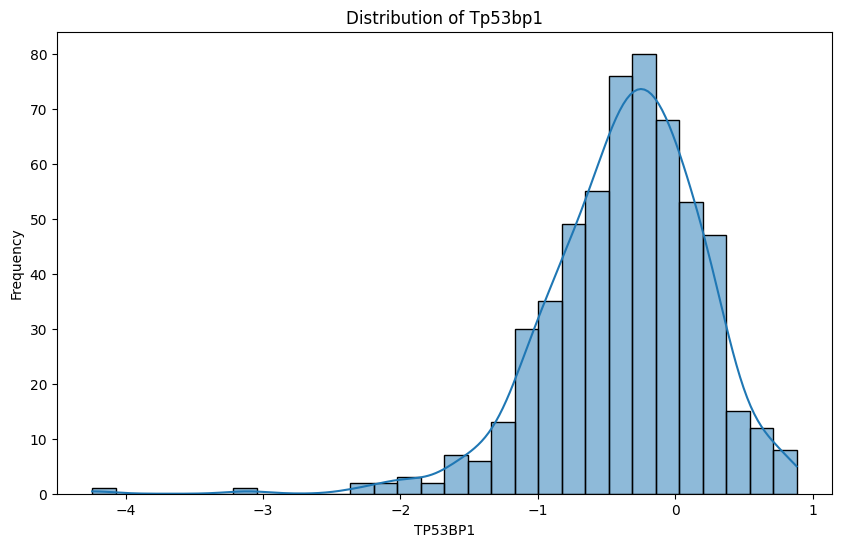

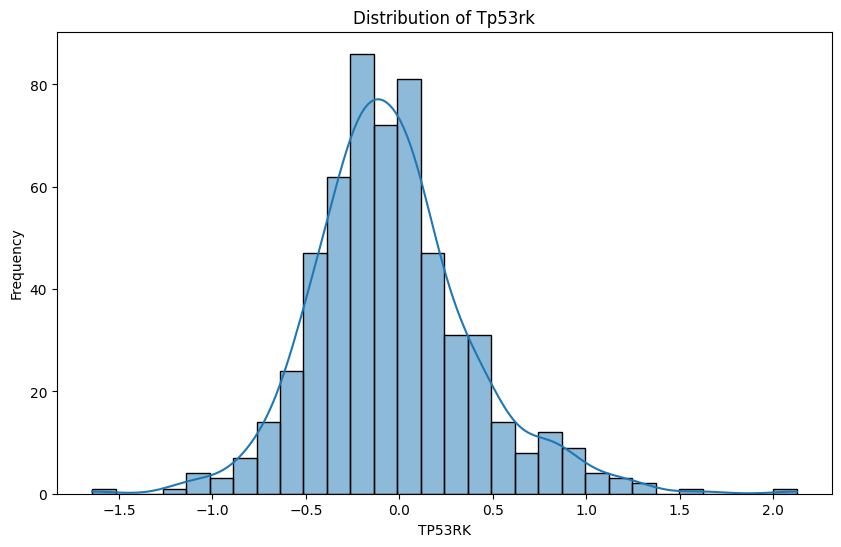

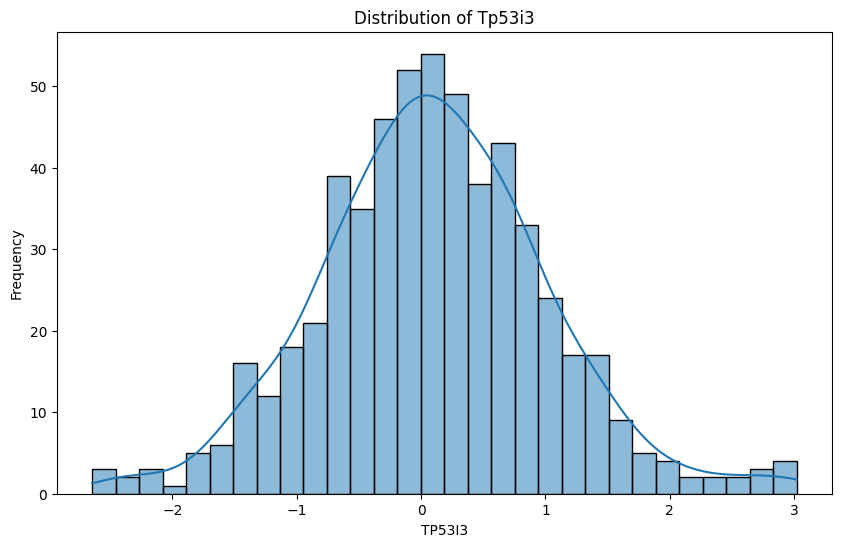

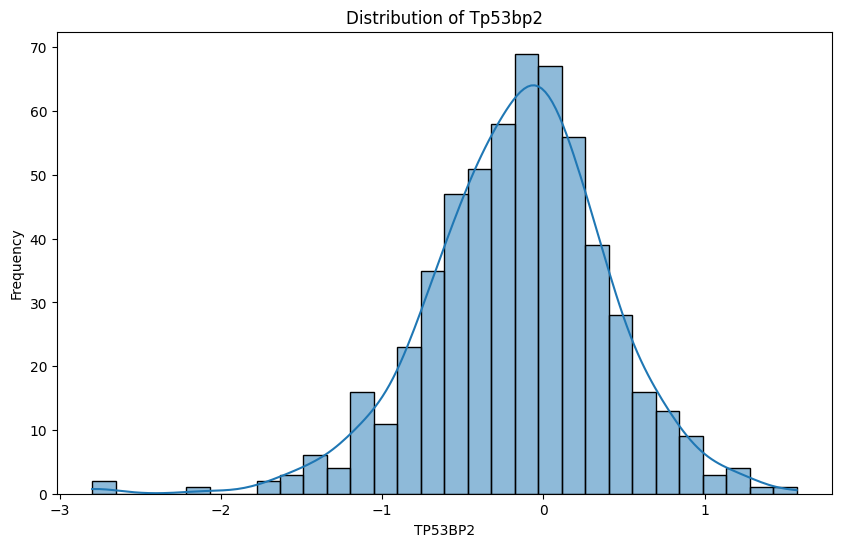

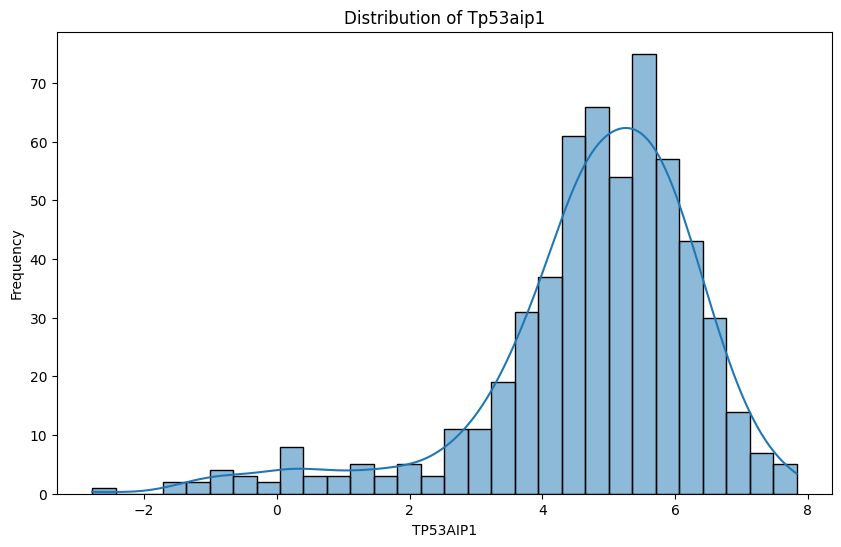

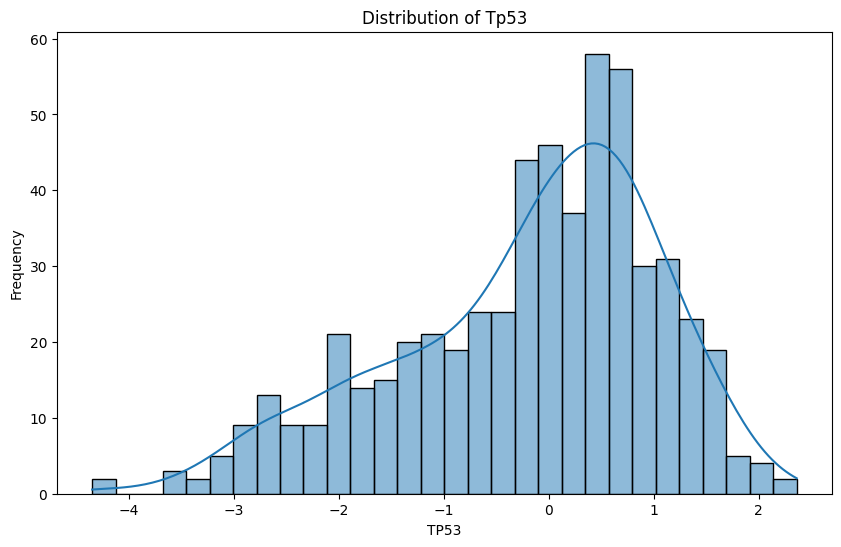

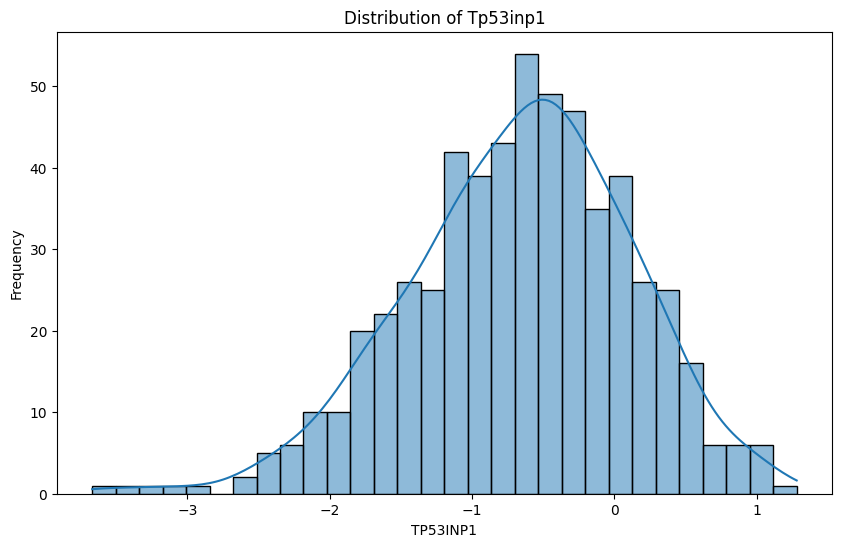

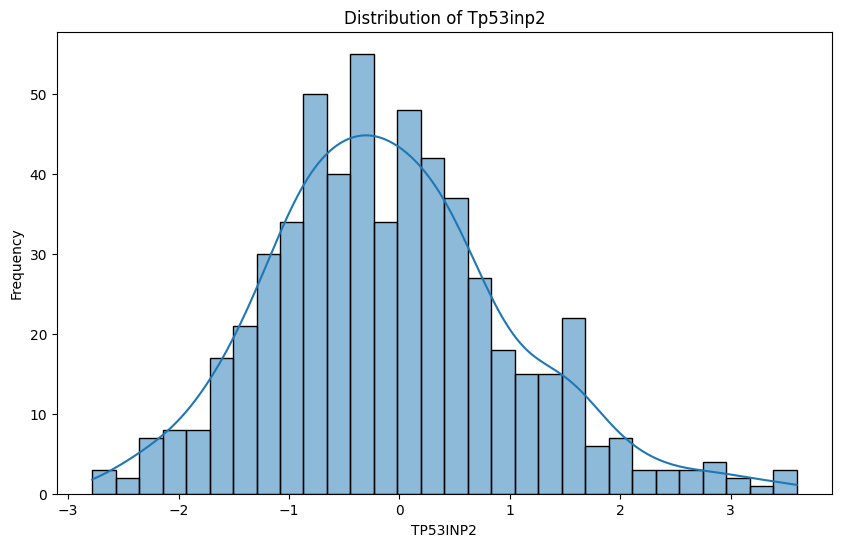

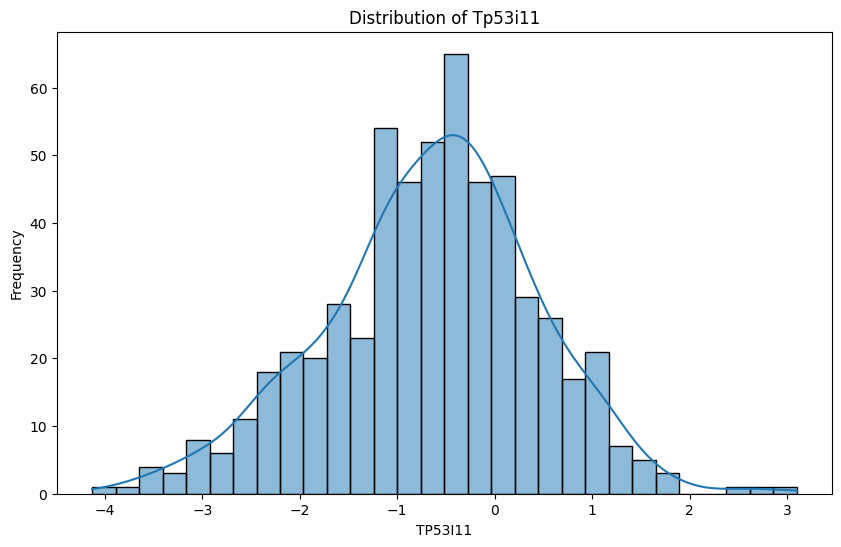

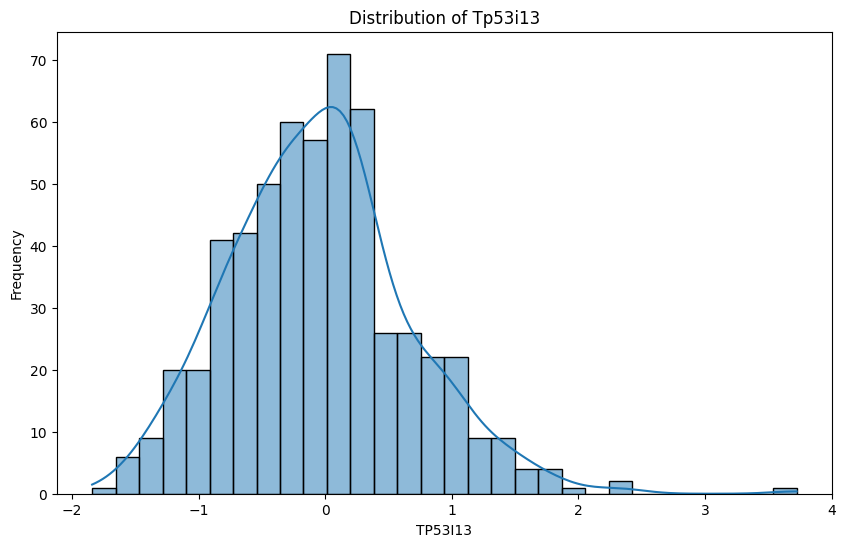

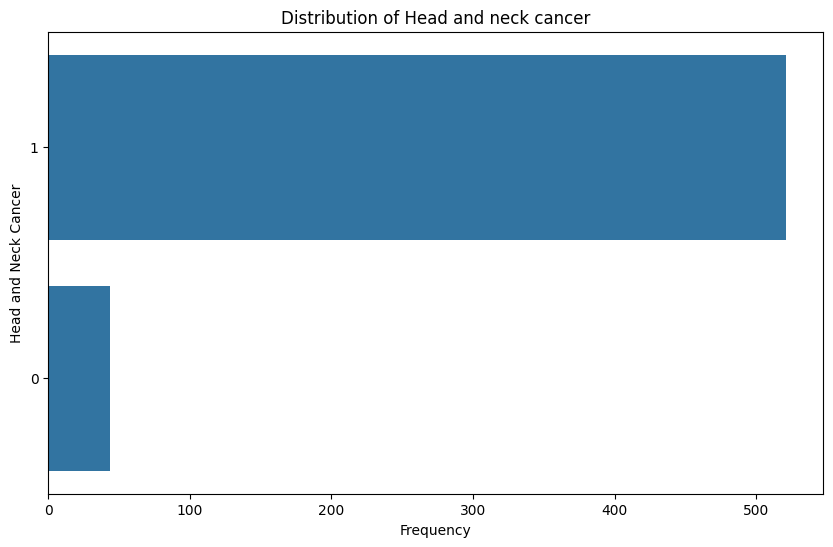

In [9]:

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

In [10]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Head and Neck Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,66,-0.471492,0.808874,-0.531035,0.233028,-0.649078,-0.88201,-0.055394,0.984354,-0.423399,...,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988,1
TCGA-BA-4074-01,69,-2.785992,0.931274,0.293365,-1.502772,0.422722,1.30079,-2.390494,-0.444746,0.685001,...,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988,1
TCGA-BA-4075-01,49,-2.609592,-4.503726,1.544765,-0.871272,0.396522,1.27679,-1.614194,-1.268446,-0.423399,...,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788,1
TCGA-BA-4076-01,39,-0.524192,-4.519426,-0.531035,-0.015372,1.143422,0.26449,-1.286294,-1.745946,-0.423399,...,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812,1
TCGA-BA-4077-01,45,0.019008,-1.699326,1.237165,-0.380472,0.060722,0.88759,-0.604294,-1.223746,0.549301,...,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688,1


### 3. Do regression & Cross Validation

In [11]:
# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

/var/folders/51/nw17mmq54k17kgt4vfq85xn40000gn/T/ipykernel_1779/1853885604.py:9: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.6793014331584306


In [12]:

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

Regression Results:

For tp53:
TP53TG5: Coefficient = -0.002235511372452154, p-value = 0.6838715471647597
TP53TG3B: Coefficient = -0.007721861129683191, p-value = 0.29726596351791607
TP53TG1: Coefficient = 0.006429498967737949, p-value = 0.5318171765065575
TP53BP1: Coefficient = -0.005127980301831084, p-value = 0.6230583885621142
TP53RK: Coefficient = -0.005877351342681697, p-value = 0.5875962044946093
TP53I3: Coefficient = -0.0014557628587838702, p-value = 0.8694374153488286
TP53BP2: Coefficient = -0.015490157067506024, p-value = 0.18323830580038766
TP53AIP1: Coefficient = -0.007354252534866488, p-value = 0.4248434266292471
TP53: Coefficient = -0.001033776126244508, p-value = 0.8753167265498591
TP53INP1: Coefficient = 0.006656357755840421, p-value = 0.5001481662741154
TP53INP2: Coefficient = -0.005642129993192748, p-value = 0.5677782296109057
TP53I11: Coefficient = -0.022561690113606044, p-value = 0.0076056197467489735
TP53I13: Coefficient = 0.02266505825841121, p-value = 0.0696744874

### 4. Discussion

In [13]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between TP53 gene and Head and Neck Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the TP53 gene and Head and Neck Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the TP53 gene and Head and Neck Cancer when considering the influence of age.




In [16]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    coef_message = {
        coefficient > 0: "positive",
        coefficient < 0: "negative"
    }.get(True, "zero")
    
    significance_message = "statistically significant" if p_value < significance_level else "not statistically significant"

    interpretation = (
        f"Variable: {variable_name}\n"
        f"Coefficient is {coef_message}, "
        f"and it is {significance_message} (p-value {'<' if p_value < significance_level else '>='} {significance_level}).\n\n"
    )

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: TP53TG5
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53TG3B
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53TG1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53RK
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53I3
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP2
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53AIP1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53INP1
Coefficient i

In [17]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Create a report for hypothesis confirmation for all variables
conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: TP53TG5
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53TG5 gene and Head and Neck Cancer when considering the influence of age.

Variable: TP53TG3B
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53TG3B gene and Head and Neck Cancer when considering the influence of age.

Variable: TP53TG1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53TG1 gene and Head and Neck Cancer when considering the influence of age.

Variable: TP53BP1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53BP1 gene and Head and Neck Cancer when considering the influence of age.

Variable: TP53RK
Conclusion: H0 is not rejected: 